# Application of Classification Models

Dataset Link

https://archive.ics.uci.edu/ml/machine-learning-databases/adult/

Problem 1:
Prediction task is to determine whether a person makes over 50K a year.

Problem 2:
Which factors are important

Problem 3:
Which algorithms are best for this dataset


# Solution

Importing the required libraries...

In [237]:
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost.sklearn import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from xgboost import plot_tree , plot_importance 
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix , precision_score, recall_score , f1_score

Reading Dataset...

In [239]:
# loading Dataset
df_AdultData_trainSet = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header = None)
df_AdultData_testSet = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test', skiprows = 1, header = None)

## Data Preprocessing Steps

In [240]:
print(df_AdultData_trainSet.shape, df_AdultData_testSet.shape)

(32561, 15) (16281, 15)


In [241]:
df_AdultData_trainSet.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [242]:
df_AdultData_testSet.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [243]:
# checking whether null values exist or not in training set
df_AdultData_trainSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
0     32561 non-null int64
1     32561 non-null object
2     32561 non-null int64
3     32561 non-null object
4     32561 non-null int64
5     32561 non-null object
6     32561 non-null object
7     32561 non-null object
8     32561 non-null object
9     32561 non-null object
10    32561 non-null int64
11    32561 non-null int64
12    32561 non-null int64
13    32561 non-null object
14    32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [244]:
# checking whether null values exist or not in test set
df_AdultData_testSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
0     16281 non-null int64
1     16281 non-null object
2     16281 non-null int64
3     16281 non-null object
4     16281 non-null int64
5     16281 non-null object
6     16281 non-null object
7     16281 non-null object
8     16281 non-null object
9     16281 non-null object
10    16281 non-null int64
11    16281 non-null int64
12    16281 non-null int64
13    16281 non-null object
14    16281 non-null object
dtypes: int64(6), object(9)
memory usage: 1.9+ MB


we can see that there is no null values present in the given datasets but we have values in form of '?'. we need to address them and need to add column headings as well.

In [245]:
# Adding column names...
col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 
              'occupation','relationship','race', 'sex', 'capital_gain', 'capital_loss', 
              'hours_per_week','native_country', 'wage_class']
df_AdultData_trainSet.columns = col_labels
df_AdultData_testSet.columns = col_labels

In [246]:
df_AdultData_trainSet.head(1)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K


In [247]:
df_AdultData_testSet.head(1)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.


In [248]:
# trimming white spaces across the datasets
df_AdultData_trainSet=df_AdultData_trainSet.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
df_AdultData_testSet=df_AdultData_testSet.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

In [249]:
# check duplicates and remove the same
if(df_AdultData_trainSet.duplicated().any()):
    df_AdultData_trainSet=df_AdultData_trainSet.drop_duplicates(keep='first')
if(df_AdultData_testSet.duplicated().any()):
    df_AdultData_testSet=df_AdultData_testSet.drop_duplicates(keep='first')

In [250]:
# finding unique values present in each categorical features
for col in df_AdultData_trainSet.columns:
    if df_AdultData_trainSet[col].dtypes == 'object':
        unique_cat = len(df_AdultData_trainSet[col].unique())
        cat_names = df_AdultData_trainSet[col].unique()
        print("{col} has {unique_cat} unique categories - {cat_names}"
              .format(col=col,unique_cat=unique_cat, cat_names= cat_names))  

workclass has 9 unique categories - ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
education has 16 unique categories - ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
marital_status has 7 unique categories - ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
occupation has 15 unique categories - ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']
relationship has 6 unique categories - ['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']
race has 5 unique categories - ['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eski

In [251]:
# Replacing '?' with 'unknown'
df_AdultData_trainSet = df_AdultData_trainSet.replace('?', 'unknown')
df_AdultData_testSet = df_AdultData_testSet.replace('?', 'unknown')

In [252]:
# Removing .symbol; in the test set for wage class column
df_AdultData_testSet['wage_class']=df_AdultData_testSet['wage_class'].replace({'<=50K.': '<=50K', '>50K.':'>50K'})

In [253]:
df_AdultData_testSet.tail()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
16277,64,unknown,321403,HS-grad,9,Widowed,unknown,Other-relative,Black,Male,0,0,40,United-States,<=50K
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K
16280,35,Self-emp-inc,182148,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,60,United-States,>50K


## Exploring Data - Analysis

In [254]:
df_AdultData_trainSet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32537 entries, 0 to 32560
Data columns (total 15 columns):
age               32537 non-null int64
workclass         32537 non-null object
fnlwgt            32537 non-null int64
education         32537 non-null object
education_num     32537 non-null int64
marital_status    32537 non-null object
occupation        32537 non-null object
relationship      32537 non-null object
race              32537 non-null object
sex               32537 non-null object
capital_gain      32537 non-null int64
capital_loss      32537 non-null int64
hours_per_week    32537 non-null int64
native_country    32537 non-null object
wage_class        32537 non-null object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


In [255]:
df_AdultData_testSet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16276 entries, 0 to 16280
Data columns (total 15 columns):
age               16276 non-null int64
workclass         16276 non-null object
fnlwgt            16276 non-null int64
education         16276 non-null object
education_num     16276 non-null int64
marital_status    16276 non-null object
occupation        16276 non-null object
relationship      16276 non-null object
race              16276 non-null object
sex               16276 non-null object
capital_gain      16276 non-null int64
capital_loss      16276 non-null int64
hours_per_week    16276 non-null int64
native_country    16276 non-null object
wage_class        16276 non-null object
dtypes: int64(6), object(9)
memory usage: 2.0+ MB


In [256]:
df_AdultData_trainSet.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32537.000000,3.253700e+04,32537.000000,32537.000000,32537.000000,32537.000000
mean,38.585549,1.897808e+05,10.081815,1078.443741,87.368227,40.440329
std,13.637984,1.055565e+05,2.571633,7387.957424,403.101833,12.346889
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369930e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [257]:
values_dict= {'<=50K':0, '>50K':1} # mapping string string values with numericalclass values
colname='wage_class'
if df_AdultData_trainSet[colname].dtype==np.object:
    df_AdultData_trainSet[colname]=df_AdultData_trainSet[colname].map(values_dict)
else:
    df_AdultData_trainSet
    
if df_AdultData_testSet[colname].dtype==np.object:
    df_AdultData_testSet[colname]=df_AdultData_testSet[colname].map(values_dict)
else:
    df_AdultData_testSet
print("Unique values of wage_class after replacing")
df_AdultData_trainSet['wage_class'].unique()

Unique values of wage_class after replacing


array([0, 1], dtype=int64)

In [258]:
df_AdultData_testSet['wage_class'].unique()

array([0, 1], dtype=int64)

In [259]:
# One Hot Encoding
object_cols = df_AdultData_trainSet.dtypes[df_AdultData_trainSet.dtypes == 'object'].index
object_cols

Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country'],
      dtype='object')

In [260]:
# One Hot Encoding
object_cols_test = df_AdultData_testSet.dtypes[df_AdultData_testSet.dtypes == 'object'].index
object_cols_test

Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country'],
      dtype='object')

In [261]:
# Training Set
if any(x in object_cols for x in df_AdultData_trainSet.columns): # list comprehension for column check
        for cols in object_cols:
            df_AdultData_trainSet = df_AdultData_trainSet.join(pd.get_dummies(df_AdultData_trainSet[cols], prefix=cols).iloc[:,:-1])
        df_AdultData_trainSet=df_AdultData_trainSet.drop(object_cols, axis=1)

# Test set
if any(x in object_cols_test for x in df_AdultData_testSet.columns): # list comprehension for column check
        for cols in object_cols_test:
            df_AdultData_testSet = df_AdultData_testSet.join(pd.get_dummies(df_AdultData_testSet[cols], prefix=cols).iloc[:,:-1])
        df_AdultData_testSet=df_AdultData_testSet.drop(object_cols_test, axis=1)

In [265]:
df_AdultData_trainSet.head(1)

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,wage_class,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native_country_Portugal,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [266]:
df_AdultData_testSet.head(1)

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,wage_class,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native_country_Portugal,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia
0,25,226802,7,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


### Seperating the target variable from rest of the dataset.

In [309]:
dep_feature=[x for x in df_AdultData_trainSet.columns.tolist() if x== 'wage_class' ]
indep_feature=[x for x in df_AdultData_trainSet.columns.tolist() if x!= 'wage_class' ]
df_target= df_AdultData_trainSet[dep_feature]
df_feature=df_AdultData_trainSet[indep_feature]

In [310]:
df_target.shape, df_feature.shape

((32537, 1), (32537, 100))

In [311]:
df_target.tail(1)

,wage_class
32560,1


In [312]:
df_feature.tail(1)

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native_country_Portugal,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia
32560,52,287927,9,15024,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


# Feature Selection and Modeling -XGBoost 

In [326]:
# Define parameter for XGBoost model
params = {'objective':'binary:logistic' , 'max_depth':7, 'learning_rate':1.0,'silent':True , 'booster':'gbtree',
         'n_estimators':400,  'random_state':42 ,'subsample':0.6,'gamma':0.9 , 'n_jobs':-1}
XGB_model_clf= XGBClassifier(**params)
xgb_model =XGB_model_clf.fit(X=df_feature, y=np.ravel(df_target))
xgb_model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0.9, learning_rate=1.0, max_delta_step=0,
       max_depth=7, min_child_weight=1, missing=None, n_estimators=400,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=0.6)

In [327]:
# From XGBoost model , Select important features
xgb_model.feature_importances_

array([1.86756238e-01, 3.56493920e-01, 5.72616756e-02, 7.67754298e-03,
       9.02111363e-03, 9.84644890e-02, 4.86244401e-03, 7.16570718e-03,
       0.00000000e+00, 2.02175304e-02, 5.88611653e-03, 8.63723643e-03,
       3.90275102e-03, 0.00000000e+00, 1.91938574e-03, 1.59948820e-03,
       1.02367240e-03, 6.39795253e-05, 6.39795253e-05, 7.67754333e-04,
       2.55918101e-04, 4.60652588e-03, 5.43825980e-03, 1.14523349e-02,
       0.00000000e+00, 1.26679465e-02, 4.54254635e-03, 0.00000000e+00,
       2.11132434e-03, 7.10172765e-03, 1.91938583e-04, 9.46896989e-03,
       1.15163147e-03, 7.35764578e-03, 8.31733865e-04, 1.03007033e-02,
       0.00000000e+00, 1.51631478e-02, 1.31797828e-02, 3.07101733e-03,
       3.26295593e-03, 6.90978905e-03, 4.54254635e-03, 0.00000000e+00,
       1.14523349e-02, 3.58285359e-03, 1.33717209e-02, 4.35060775e-03,
       6.71785045e-03, 1.27959056e-02, 7.74152251e-03, 5.11836202e-04,
       1.79142680e-03, 4.79846448e-03, 7.67754333e-04, 2.87907873e-03,
      

In [328]:
df_feature_importances = pd.DataFrame({'feature':df_feature.columns,'importance':np.round(xgb_model.feature_importances_,4)})
df_feature_importances = df_feature_importances.sort_values('importance',ascending=False)
df_feature_importances.head(25)

,feature,importance
1,fnlwgt,0.3565
0,age,0.1868
5,hours_per_week,0.0985
2,education_num,0.0573
9,workclass_Private,0.0202
37,occupation_Craft-repair,0.0152
58,sex_Female,0.0136
46,occupation_Sales,0.0134
38,occupation_Exec-managerial,0.0132
49,relationship_Husband,0.0128


In [329]:
df_important_features=df_feature_importances[df_feature_importances.importance>=0.01]
df_important_features

,feature,importance
1,fnlwgt,0.3565
0,age,0.1868
5,hours_per_week,0.0985
2,education_num,0.0573
9,workclass_Private,0.0202
37,occupation_Craft-repair,0.0152
58,sex_Female,0.0136
46,occupation_Sales,0.0134
38,occupation_Exec-managerial,0.0132
49,relationship_Husband,0.0128


<Figure size 1080x720 with 0 Axes>

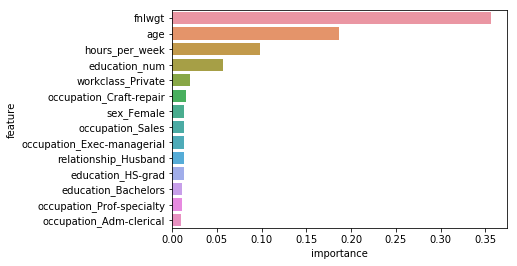

<Figure size 1080x720 with 0 Axes>

In [330]:
sns.barplot(x=df_important_features.importance , y=df_important_features.feature)
plt.figure(figsize=(15,10))

In [331]:
important_cols = df_important_features.feature.values
print(" Important features(columns) returned by model")
important_cols

 Important features(columns) returned by model


array(['fnlwgt', 'age', 'hours_per_week', 'education_num',
       'workclass_Private', 'occupation_Craft-repair', 'sex_Female',
       'occupation_Sales', 'occupation_Exec-managerial',
       'relationship_Husband', 'education_HS-grad', 'education_Bachelors',
       'occupation_Prof-specialty', 'occupation_Adm-clerical'],
      dtype=object)

# Re-fitting the Model with important features

In [332]:
XGB_model_clf= XGBClassifier(**params)
xgb_model =XGB_model_clf.fit(X=df_feature[important_cols], y=np.ravel(df_target))
xgb_model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0.9, learning_rate=1.0, max_delta_step=0,
       max_depth=7, min_child_weight=1, missing=None, n_estimators=400,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=0.6)

## Model Evaluation on Test Dataset 

In [333]:
dep_feature=[x for x in df_AdultData_testSet.columns.tolist() if x== 'wage_class' ]
indep_feature=[x for x in df_AdultData_testSet.columns.tolist() if x!= 'wage_class' ]
df_target_test= df_AdultData_testSet[dep_feature]
df_feature_test=df_AdultData_testSet[indep_feature]

y_pred=xgb_model.predict(df_feature_test[important_cols])
y_pred_proba=xgb_model.predict_proba(df_feature_test[important_cols])

C:\Users\mkarthikeyan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [334]:
print("Predicted target variable (first 5 values):",y_pred[0:5])
print("Predicted target variable probabilities (first 5 values):\n",y_pred_prob[0:5])

Predicted target variable (first 5 values): [0 1 1 1 0]
Predicted target variable probabilities (first 5 values):
 [[1.0618925e-02 9.8938107e-01]
 [9.9997932e-01 2.0655802e-05]
 [9.9920726e-01 7.9273549e-04]
 [9.9999803e-01 1.9444028e-06]
 [6.8748909e-01 3.1251091e-01]]


### Model Evaluation Metrics
    - Confusion_matrix , Classification report , accuracy score, f-1 score , recall score, precision score ,
      roc_auc curve, auc , precision_recall_curve

In [335]:
actual_target_variable= df_target_test
predicted_target_variable=y_pred

# confusion matrix
confusion_matrix(y_true=actual_target_variable , y_pred=predicted_target_variable)

array([[10738,  1692],
       [ 1914,  1932]], dtype=int64)

In [336]:
# Classification report
classification_report(y_true=actual_target_variable , y_pred=predicted_target_variable , target_names=['<=50K' , '>50K'])

'             precision    recall  f1-score   support\n\n      <=50K       0.85      0.86      0.86     12430\n       >50K       0.53      0.50      0.52      3846\n\navg / total       0.77      0.78      0.78     16276\n'

In [338]:
acc_score= accuracy_score(y_true=actual_target_variable , y_pred=predicted_target_variable)
prec_score=precision_score(y_true=actual_target_variable , y_pred=predicted_target_variable)
recl_score= recall_score(y_true=actual_target_variable, y_pred=predicted_target_variable)
f1score= f1_score(y_true= actual_target_variable, y_pred=predicted_target_variable)

In [325]:
print("Model Accuracy score (on Test set) :", acc_score )
print("Model Precision score (on Test set) :", prec_score )
print("Model Recall score (on Test set) :", recl_score)
print("Model F-1 score (on Test set) :", f1score)

Model Accuracy score (on Test set) : 0.7861882526419267
Model Precision score (on Test set) : 0.5513180033651149
Model Recall score (on Test set) : 0.5111804472178887
Model F-1 score (on Test set) : 0.5304910955207771


## Problem 1:
    Prediction task is to determine whether a person makes over 50K a year.
    
#### Solution:
Yes, we can predict whether a person makes over 50k a year or not using XGBoost Classifier with important features and the accuracy is around 78.5 % 

## Problem 2:
    Which factors are important
    
#### Solution:
Following are some of the important features observed by the Model:

In [339]:
important_cols = df_important_features.feature.values
print(" Important features(columns) returned by model")
important_cols

 Important features(columns) returned by model


array(['fnlwgt', 'age', 'hours_per_week', 'education_num',
       'workclass_Private', 'occupation_Craft-repair', 'sex_Female',
       'occupation_Sales', 'occupation_Exec-managerial',
       'relationship_Husband', 'education_HS-grad', 'education_Bachelors',
       'occupation_Prof-specialty', 'occupation_Adm-clerical'],
      dtype=object)

# Problem 3:
    Which algorithms are best for this dataset
    
#### Solution:


In [341]:
# Let's try Logistics, decision tree, random forest , Xgboost models
# Parameter for XGboost model
model_params = {'objective':'binary:logistic' , 'max_depth':7, 'learning_rate':1.0,'silent':True , 'booster':'gbtree',
         'n_estimators':400,  'random_state':15 ,'subsample':0.6,'gamma':0.9 , 'n_jobs':10}
# Model names for Classification model comparison
model_names=["Decision Tree", "Random Forest", "XGBoost", "Logistics Regression"]
# Apply model to some variables
dec_tree_clf = DecisionTreeClassifier(max_depth=5)
xgboost_clf = XGBClassifier(**model_params)
random_forest_clf = RandomForestClassifier(n_estimators=100)
logistics_clf = LogisticRegression()

model_classifiers=[dec_tree_clf, random_forest_clf,xgboost_clf, logistics_clf]

In [343]:
# Fit the Models into classifiers
for clf in zip(model_names, model_classifiers):
    clf[1].fit(df_feature_test, df_target_test)

C:\Users\mkarthikeyan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\mkarthikeyan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mkarthikeyan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mkarthikeyan\AppData\Local\Continuum\anaconda3\lib\site-pa

In [350]:
# Model Comparison
classification_models = pd.DataFrame(index=['accuracy_score','precision_score','recall_score','f1-score'  ], 
                      columns=['logistic_regression','decision_tree','random_forest','xgboost'])

In [352]:
classification_models.loc['accuracy_score','logistic_regression'] = accuracy_score(y_true= df_target_test , y_pred= logistics_clf.predict(df_feature_test) )
classification_models.loc['precision_score','logistic_regression'] = precision_score(y_true= df_target_test , y_pred= logistics_clf.predict(df_feature_test))
classification_models.loc['recall_score','logistic_regression'] = recall_score(y_true= df_target_test , y_pred=logistics_clf.predict(df_feature_test) )
classification_models.loc['f1-score','logistic_regression'] = f1_score(y_true= df_target_test, y_pred= logistics_clf.predict(df_feature_test))

classification_models.loc['accuracy_score','decision_tree'] = accuracy_score(y_true= df_target_test , y_pred= dec_tree_clf.predict(df_feature_test) )
classification_models.loc['precision_score','decision_tree'] = precision_score(y_true= df_target_test , y_pred= dec_tree_clf.predict(df_feature_test))
classification_models.loc['recall_score','decision_tree'] = recall_score(y_true= df_target_test , y_pred= dec_tree_clf.predict(df_feature_test) )
classification_models.loc['f1-score','decision_tree'] = f1_score(y_true= df_target_test, y_pred= dec_tree_clf.predict(df_feature_test))

classification_models.loc['accuracy_score','random_forest'] = accuracy_score(y_true= df_target_test , y_pred= random_forest_clf.predict(df_feature_test) )
classification_models.loc['precision_score','random_forest'] = precision_score(y_true= df_target_test , y_pred= random_forest_clf.predict(df_feature_test))
classification_models.loc['recall_score','random_forest'] = recall_score(y_true= df_target_test , y_pred= random_forest_clf.predict(df_feature_test) )
classification_models.loc['f1-score','random_forest'] = f1_score(y_true= df_target_test, y_pred= random_forest_clf.predict(df_feature_test))

classification_models.loc['accuracy_score','xgboost'] = accuracy_score(y_true= df_target_test , y_pred= xgboost_clf.predict(df_feature_test) )
classification_models.loc['precision_score','xgboost'] = precision_score(y_true= df_target_test , y_pred= xgboost_clf.predict(df_feature_test))
classification_models.loc['recall_score','xgboost'] = recall_score(y_true= df_target_test , y_pred= xgboost_clf.predict(df_feature_test) )
classification_models.loc['f1-score','xgboost'] = f1_score(y_true= df_target_test, y_pred= xgboost_clf.predict(df_feature_test))


C:\Users\mkarthikeyan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\mkarthikeyan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\mkarthikeyan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\mkarthikeyan\AppData\Local\Continuum\anaconda3\lib\site-packages\sk

In [353]:
print("Results of the classification models:")
classification_models

Results of the classification models:


,logistic_regression,decision_tree,random_forest,xgboost
accuracy_score,0.798538,0.854264,0.999877,0.999078
precision_score,0.709225,0.785217,1,0.999218
recall_score,0.24987,0.527561,0.99948,0.99688
f1-score,0.369544,0.631104,0.99974,0.998048


### Looks like, Random Forest, XG Boost algorithms works best for the given dataset